<a href="https://colab.research.google.com/github/ShakedZrihen/worldwide-song-hit-formula/blob/predictions/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict if song can be a hit

## Imports and mount dataset

In [1]:
## General
from google.colab import drive
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## ML Algorithms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


## Load data set

In [3]:
charts_data_df = pd.read_csv('/content/gdrive/MyDrive/OpenUniversity/DS/finalDataset/chartsData.csv')

In [4]:
charts_data_df.head(10)

,Unnamed: 0,Artist,Position,Streams,Track Name,URL,country,dates
0,0,Red Velvet,1,205528,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,Viet Nam,2019-12-27--2020-01-03
1,1,Red Velvet,106,314994,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,Indonesia,2020-11-13--2020-11-20
2,2,Red Velvet,107,79162,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,Thailand,2020-11-20--2020-11-27
3,3,Red Velvet,82,64279,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,Singapore,2020-07-31--2020-08-07
4,4,Red Velvet,91,367569,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,Indonesia,2020-10-09--2020-10-16
5,5,Red Velvet,138,22725,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,Hong Kong,2020-07-10--2020-07-17
6,6,Red Velvet,131,102957,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,Japan,2019-12-27--2020-01-03
7,7,Red Velvet,125,6432,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,United Arab Emirates,2020-01-03--2020-01-10
8,8,Red Velvet,28,141716,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,Malaysia,2020-03-20--2020-03-27
9,9,Red Velvet,5,98150,Psycho,https://open.spotify.com/track/3CYH422oy1cZNoo...,Viet Nam,2020-01-31--2020-02-07


## Get all top 10 songs

In [5]:
top_10_songs_df = charts_data_df[charts_data_df.Position <= 10]
print(f'Top 10 songs (with duplications): {len(top_10_songs_df)}')

# Top 10 songs (without duplications)
top_10_songs_uniqu_df = top_10_songs_df['URL'].unique()
print(f'Top 10 songs (without duplications): {len(top_10_songs_uniqu_df)}')

Top 10 songs (with duplications): 107460
Top 10 songs (without duplications): 6749


In [6]:
# Get most popular songs in top 10 charts
top_10_songs_dup_df = top_10_songs_df.pivot_table(columns=['Track Name', 'Artist'], aggfunc='size').sort_values(ascending=False)
top_10_songs_dup_df.head(10)

Track Name                                      Artist       
Blinding Lights                                 The Weeknd       1558
Dance Monkey                                    Tones And I      1409
Señorita                                        Shawn Mendes     1007
bad guy                                         Billie Eilish     833
Roses - Imanbek Remix                           SAINt JHN         767
Don't Start Now                                 Dua Lipa          635
Without Me                                      Halsey            620
Mood (feat. iann dior)                          24kGoldn          608
ROCKSTAR (feat. Roddy Ricch)                    DaBaby            602
Taki Taki (with Selena Gomez, Ozuna & Cardi B)  DJ Snake          599
dtype: int64

In [7]:
# Get most popular artist
top_10_songs_dup_df = top_10_songs_df.pivot_table(columns=['Artist'], aggfunc='size').sort_values(ascending=False)
top_10_songs_dup_df.head(10)

Artist
Bad Bunny        3604
Post Malone      2591
Ariana Grande    2589
The Weeknd       2217
Billie Eilish    1941
Drake            1767
J Balvin         1484
Anuel AA         1432
Tones And I      1412
Sech             1327
dtype: int64

## Prepare our dataset for build our models

### Descibe our models

In [8]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}


### Final data tunning

In [9]:
# Add target column
set_unique = set(top_10_songs_uniqu_df)
charts_data_df['target'] = charts_data_df.apply(lambda row: 1 if row.URL in set_unique else 0, axis=1)


In [10]:
charts_data_df['id'] = charts_data_df.apply(lambda row: row.URL.rsplit('/', 1)[-1], axis=1) 
charts_data_df.sample(10)

,Unnamed: 0,Artist,Position,Streams,Track Name,URL,country,dates,target,id
336384,336384,XXXTENTACION,145,420359,Jocelyn Flores,https://open.spotify.com/track/7m9OqQk4RVRkw9J...,United Kingdom,2020-02-07--2020-02-14,1,7m9OqQk4RVRkw9JJdeAw96
266148,266148,Travis Scott,122,52309,HIGHEST IN THE ROOM,https://open.spotify.com/track/3eekarcy7kvN4yt...,Malaysia,2020-01-24--2020-01-31,1,3eekarcy7kvN4yt5ZFzltW
1224324,1224324,CamelPhat,123,39331,Cola,https://open.spotify.com/track/1HrMWH5GUdK6Yi9...,Ireland,2018-07-27--2018-08-03,0,1HrMWH5GUdK6Yi94rbANJA
1979268,1979268,Itzo Hazarta,118,5044,Sarceto Na Hlebarkata,https://open.spotify.com/track/6hi2dKBqNA63Eod...,Bulgaria,2019-10-04--2019-10-11,1,6hi2dKBqNA63EodoW3mGMp
1652416,1652416,Bagossy Brothers Company,47,36669,Visszajövök,https://open.spotify.com/track/3UGHQNNcJNkowbi...,Hungary,2020-05-08--2020-05-15,0,3UGHQNNcJNkowbiI8Iahy0
645443,645443,BTS,101,263274,Dis-ease,https://open.spotify.com/track/54DmTIv86D3sYdi...,Turkey,2020-11-20--2020-11-27,1,54DmTIv86D3sYdiawjULQ0
545142,545142,BTS,58,28769,FAKE LOVE,https://open.spotify.com/track/3aW0ds4A4tSQDIp...,Hong Kong,2018-07-06--2018-07-13,1,3aW0ds4A4tSQDIp75FqWTo
849344,849344,Bobby Helms,12,93915,Jingle Bell Rock,https://open.spotify.com/track/7vQbuQcyTflfCIO...,Hong Kong,2020-12-18--2020-12-25,1,7vQbuQcyTflfCIOu3Uzzya
1104417,1104417,Ronghao Li,33,100581,年少有為,https://open.spotify.com/track/6XY80Ofqd8j0SGi...,"Taiwan, Province of China",2019-08-16--2019-08-23,1,6XY80Ofqd8j0SGiEdRLwCp
2101799,2101799,Ninho,176,287197,Mac 11,https://open.spotify.com/track/15UV9ARr2bzPOEZ...,France,2020-11-20--2020-11-27,0,15UV9ARr2bzPOEZb2QbTae


In [11]:
## load songs data
songsData = pd.read_csv('/content/gdrive/MyDrive/OpenUniversity/DS/finalDataset/uniquSongsData.csv')
del songsData['track_href']
del songsData['name']
songsData.sample(5)


,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,numeric_key,popularity,speechiness,tempo,time_signature,valence
8312,0.79200,0.599,150067.0,0.462,0PoPFCqGko4AL75oEvsnyc,0.000006,F,0.252,-9.504,0.0,5.0,0.0,0.3640,179.910,4.0,0.456
36101,0.72700,0.340,180947.0,0.472,6XgeZZ2jzDcUyq1Y0BqPKF,0.000000,G,0.761,-8.312,1.0,7.0,7.0,0.0609,180.000,3.0,0.571
19382,0.95800,0.275,146730.0,0.237,2uNIYdShR5ElJ3wXcq9XgZ,0.870000,A,0.107,-23.585,1.0,9.0,0.0,0.0491,141.209,3.0,0.616
45403,0.59300,0.697,142500.0,0.492,5a5Hm2dbriyUhtITZsMT2E,0.843000,C#,0.146,-7.956,0.0,1.0,22.0,0.0722,160.069,4.0,0.456
55443,0.00611,0.609,210817.0,0.547,3uGC6kXrzDmbKlfMhI5Flz,0.000000,C#,0.236,-7.282,1.0,1.0,29.0,0.0646,159.736,4.0,0.151


In [12]:
## Get our full df
prepared_df = pd.merge(charts_data_df.drop_duplicates(subset=['id'], keep='last'), songsData, on=['id'])
del prepared_df['Unnamed: 0']
prepared_df.sample(5)

,Artist,Position,Streams,Track Name,URL,country,dates,target,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,numeric_key,popularity,speechiness,tempo,time_signature,valence
27239,Artigeardit,133,71138,Joggingsæt,https://open.spotify.com/track/6BwEVjXikIn5Htj...,Denmark,2019-04-19--2019-04-26,0,6BwEVjXikIn5HtjcZ3Vmdr,0.120,0.765,167721.0,0.687,0.000006,A#,0.0796,-6.306,0.0,10.0,45.0,0.1910,83.011,4.0,0.485
42233,Anne,178,652134,Are baba,https://open.spotify.com/track/1IfEBUFHQbv2E1W...,Brazil,2020-01-17--2020-01-24,0,1IfEBUFHQbv2E1W0867av9,0.606,0.810,200026.0,0.785,0.000002,C#,0.1590,-0.963,1.0,1.0,3.0,0.0556,149.944,4.0,0.913
51706,Bano,159,160255,Wip Wap (Produced by Djamaya),https://open.spotify.com/track/68pRdvz386EQjif...,Netherlands,2018-07-27--2018-08-03,0,68pRdvz386EQjifxMW6igs,0.146,0.851,182400.0,0.595,0.000762,A,0.1360,-5.273,0.0,9.0,8.0,0.2920,100.070,4.0,0.692
7148,Morat,151,25703,Enamórate De Alguien Más,https://open.spotify.com/track/1fXKStjVOTmBEwj...,Guatemala,2019-12-20--2019-12-27,0,1fXKStjVOTmBEwjAnFSNkc,0.466,0.592,229107.0,0.643,0.000000,B,0.3150,-5.608,1.0,11.0,67.0,0.0321,145.979,4.0,0.579
26612,Felipe Araújo,124,804074,Reincidente,https://open.spotify.com/track/3XG1frltSxibGuY...,Brazil,2020-10-30--2020-11-06,0,3XG1frltSxibGuYLPucxl8,0.559,0.716,177692.0,0.715,0.000000,C#,0.1120,-4.775,1.0,1.0,57.0,0.0422,137.012,4.0,0.632


### Some features comparison

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


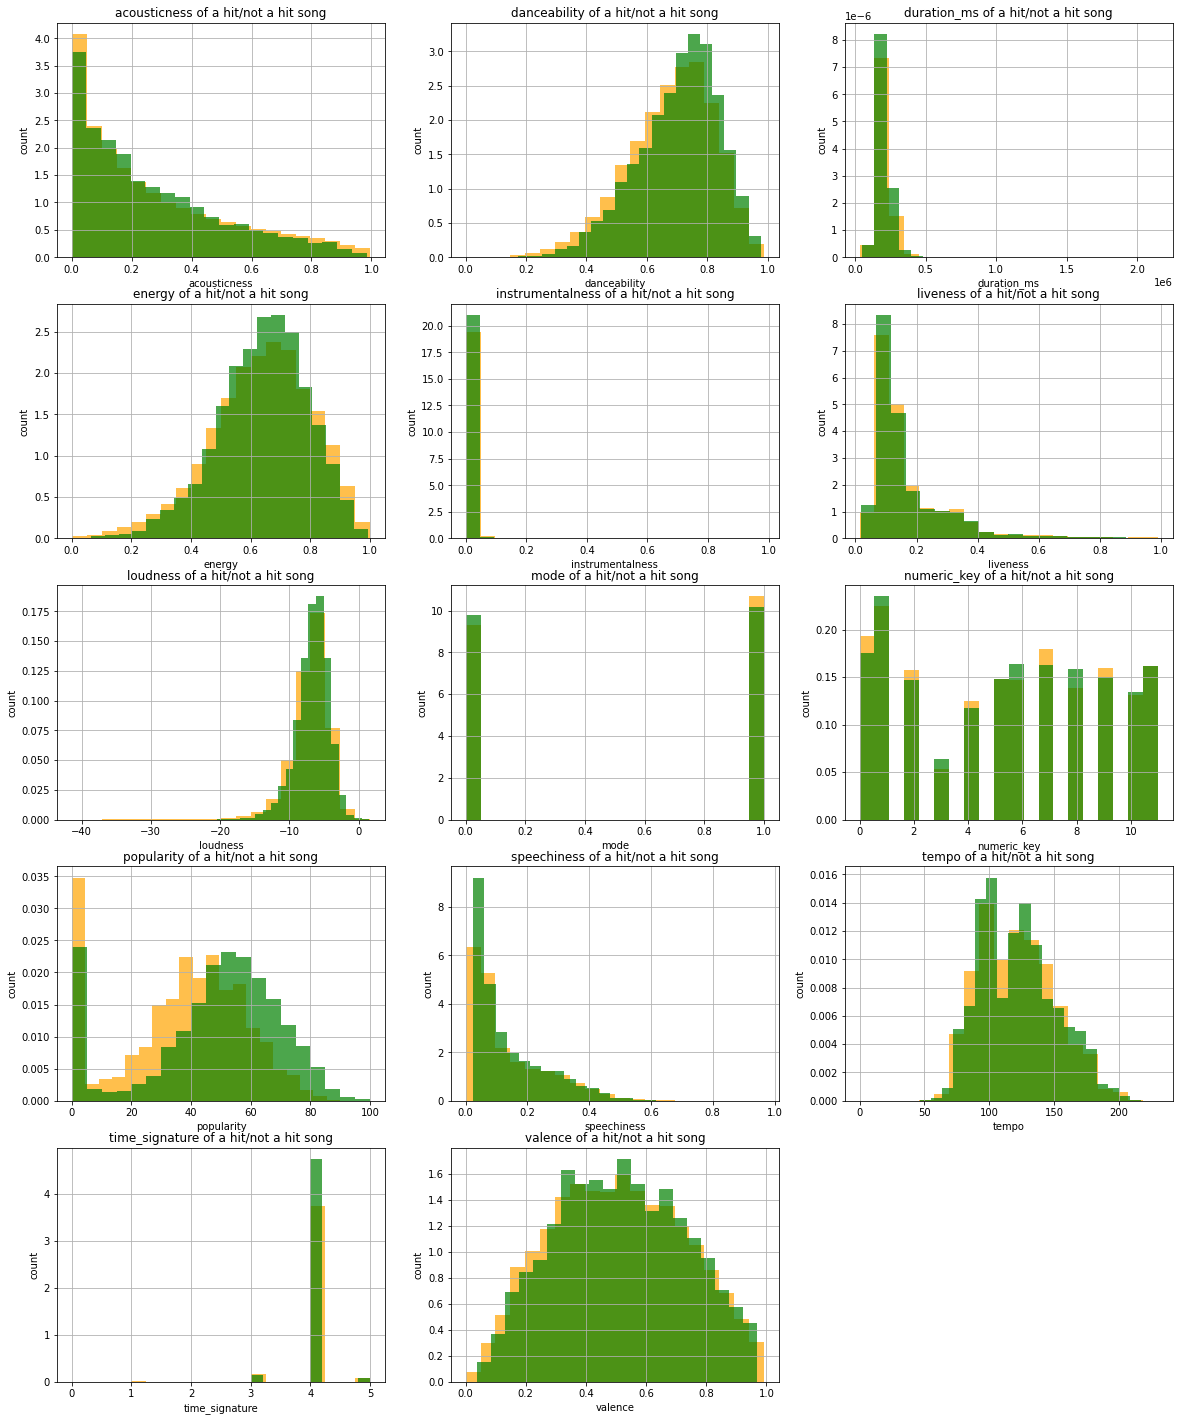

In [40]:
hits_df = prepared_df[prepared_df['target'] == 1]
no_hits_df = prepared_df[prepared_df['target'] == 0]

features = songsData.drop(['id', 'key'], axis=1).columns
fig = plt.figure(figsize=(20, 25))
for index, feature in enumerate(features):
  hits_feature_df = hits_df[feature]
  no_hits_feature_df = no_hits_df[feature]
  a_feature = fig.add_subplot(5,3,index+1)
  a_feature.set_xlabel(feature)
  a_feature.set_ylabel('count')
  a_feature.set_title('{feature} of a hit/not a hit song'.format(feature=feature))
  no_hits_feature_df.hist(alpha=0.7, bins = 20, density=True, color = "orange")
  fig.add_subplot(5,3,index+1)
  hits_feature_df.hist(alpha=0.7, bins = 20, label = 'hit', density=True, color = "green")



### Preprocess

In [41]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop high-cardinality categorical columns
    df = df.drop(['Track Name', 'Artist', 'URL', 'dates', 'id', 'country', 'key'], axis=1)
    
    # Split df into X and y
    y = df['target']
    X = df.drop('target', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [42]:
X_train, X_test, y_train, y_test = preprocess_inputs(prepared_df)

### Train models

In [43]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.
Support Vector Machine (RBF Kernel) trained.
Random Forest trained.
Gradient Boosting trained.


### Get models scores

In [44]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))


Logistic Regression: 90.16%
K-Nearest Neighbors: 88.92%
Decision Tree: 84.85%
Support Vector Machine (RBF Kernel): 89.48%
Random Forest: 91.30%
Gradient Boosting: 91.31%
